# Executive Summary: Pokemon API

## Background

##### Pokemon (short for Pocket Monsters) began in the mid-90s as a pair of RPG video games for the original Game Boy, and has since grown into an entire franchise that includes a succession of video games, a trading card game, manga, an anime television show with companion movies, and a location-based augmented reality app, not to mention fan merchandise like plushies and clothing.  The creation of game designer Satoshi Tajiri, Pokemon was inspired by his childhood hobby of insect collecting, and collecting has remained a theme throughout all aspects of the franchise -- after all, its English-language catchphrase is “Gotta Catch ‘Em All!”  An exploratory component goes hand-in-hand with the collecting aspect, as certain Pokemon are native to and only found in particular areas or “regions” of the Pokemon universe.  Along with trying to collect the different species, a central object of the games is to train one’s Pokemon to learn new attacks and gain experience in order to win battles with other players (aka “trainers”).  

##### The original two Pokemon video games featured 151 distinct Pokemon species for players to collect.  Since then, a new “generation” or set of Pokemon has been introduced every few years as the basis of additional video games and to expand the Pokemon universe in general.  Currently, there are 898 species in the Pokemon universe, with some regional variants and alternate-color rarities (known as “shinies”) offering gamers additional variety.  Similar to other RPGs and deck-building strategy games, Pokemon can be described by a number of numeric stats, including experience, hit points (HP), height, weight, and so on.  Non-numeric stats include move sets and type.  Certain Pokemon can also “evolve” into stronger, more powerful forms.  With so many quantitative and qualitative attributes possible, the set of all 898 Pokemon is excellent material for data analysis.

## API and Questions

##### Like any phenomenon with a large fan base, Pokemon has its fair share of online user-generated information resources, including a wiki called Bulbapedia and a robust wealth of data housed at PokeAPI:

##### https://pokeapi.co/docs/v2

##### PokeAPI breaks down its database into a number of subsets on game components such as evolution, generation, game version, etc.  For the purpose of this project, we focused our attention on segmenting the 898 Pokemon by generation, key stats, and type.  We used these datasets to explore the following questions and themes:



### Generational Differences
##### Does Pokemon type change across different generations and if so, how?  
##### Are there generational differences in Pokemon base experience?

### Attributes and Stats
##### Are the different Pokemon attributes (for example, height, weight) & stats (base: experience, hp, attack, defense, etc) related and, if so, how? 

### Type Impacts
##### Does Pokemon type impact attributes and/or base statistics such as hp, experience, attack, defense?   
##### Do Pokemon that have 2 types have an advantage (in terms of attributes and base stats) over pokemon that only have one type? 

## Investigation and Statistical Analysis

### Generational Differences

#### Does Pokemon type change across different generations and if so, how?

##### We plotted the number of Pokemon for each type in a count plot for the full population and for generations 1-8. Since some Pokemon have more than 1 type, we plotted these distributions for Type 1 and Type 2 for all Pokemon. We compared the distribution over generations and were able to identify key differences. In particular, we noted that there was apparent increased variability from the overall dataset in and after the 4th generation. This may be due to habitat variability in the various regions represented in each game/generation. Just under 50% of Pokemon (overall) also represent 2 types. Overall, water, normal, and grass types are the most prevalent while fairy and flying are the least common. 

#### Are there generational differences in Pokemon base experience?

##### Summary statistics, visually represented in box plots, indicate that there likely are some generational differences in Pokemon base experience. The most divergent generations are generations 4-8 and in particular, generations 4 and 7. We could also use t-tests and p-values to further study these differences. These differences warrant further exploration to understand why they exist, however it seems reasonable to think that these differences may be due to shifting habitat types. Each generation represents a distinct region with varying characteristics, so it reasonable to think there could be an impact on attributes and stats, including the base xp of the Pokemon found in that region. A future investigation could test this hypothesis. 

### Attributes & Stats

#### How are the different Pokemon attributes (for example, height, weight) related to one another and do they impact stats such as base experience, attack, and defense? 

##### We compared a number of Pokemon attributes and stats using scatterplots. We calculated the Pearson’s r values for these relationships but did not attempt linear or any other type of regression analysis. There are some (fairly weak) positive correlations between Pokemon attributes. For example, heavier Pokemon tend to be taller (with a few notable exceptions), Pokemon with higher base_xp also have better base attacks, defense, etc. However these correlations are not strong and there are notable exceptions that warrant further study and analysis. While there are some observable correlations, there does not appear to be anything that we could consider as predictive.

### Type Impacts
#### Does Pokemon type impact base attributes (height, weight) and stats (hp, experience, attack, defense)? 

##### There are differences in attributes and stats based on Pokemon type. We calculated several statistical values and also used boxplot to visualize differences due to Pokemon type. In most cases, similar patterns are seen when comparing Type 1 and Type 2 for the various species. Notably, certain types are more divergent than others when it comes to attributes and stats. For example, rock, steel and dragon types are heavier than others. Fairy and grass types tend to be lighter. There is less height variability but some still exists. In terms of stats, we similarly observe that different types are impacted differently for each attribute and stat studied. For instance, we can see that dragon types tend to have higher than "average" base experience values.

  
#### Do pokemon that have 2 types have an advantage (in terms of attributes and base stats) over pokemon that only have one type? 

##### We compared the attributes (height, weight) and base stats (hp, xp, attack, etc) for Pokemon representing only 1 type compared to Pokemon having 2 types. We made use of boxplots to visualize the differences between the number of types. In order to determine the statistical significance of differences between these 2 sub-populations, we used t-tests and calculated p-values. We used a p-value threshold of 0.05 to determine statistical significance. Overall, there exist many statistically significant differences in the attributes and base stats for Pokemon belonging to 2 types compared to Pokemon belonging to only 1 type. Pokemon with 2 types tend to be heavier, taller, have higher: base xp, attack and defense (and special attack and defense). There was no apparent difference in speed or base hp. However, much of the game is based on type advantage compared to your opponent. So having 2 types means you have potential advantages but also additional weaknesses and disadvantages. These increases in base stats may be included to at least partially make up for the increased weaknesses inferred by having 2 types.

## Bias and further future evaluation
##### Evolutionary trees, mythical, and legendary Pokemon were stored in different APIs and those factors were not included in these analyses. They represent interesting future research and do have the potential to have biased our results and interpretations. We know that in particular, Pokemon evolution has an impact on size and stats. By definition, evolution leads to Pokemon that are stronger, more powerful, and often larger. We likely picked this up in some of the visualizations of Pokemon attributes and stats (for example, the 3 distinct groupings we noticed in base hp vs base xp). This is a huge dataset with many other potentials we could consider. Pokemon grow at different rates, inhabit different environments, some come in “baby” forms that only hatch from eggs while others don’t, etc. While we only scratched the surface of the world of Pokemon in this analysis, we managed to uncover some interesting differences, trends and relationships! 




### Pulling down the data from our chosen API

In [1]:
# https://pokeapi.co/api/v2/ability/{id or name}/
# Don't modify this cell.
# Dependencies and Setup
#Data for all 898 pokemon

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from pprint import pprint
#import pokepy
from random import randint

#Hitting the API and pulling down data for all pokemon in the specified range in json format
base_url = "https://pokeapi.co/api/v2/pokemon/"
pokemon = []
for i in range(1,899):
    #Printing a status so we can make sure data is being pulled
    print(i/898*100)
    req = requests.get(base_url + str(i))
    pokemon.append(req.json())

0.11135857461024498
0.22271714922048996
0.33407572383073497
0.4454342984409799
0.5567928730512249
0.6681514476614699
0.779510022271715
0.8908685968819599
1.0022271714922049
1.1135857461024499
1.2249443207126949
1.3363028953229399
1.447661469933185
1.55902004454343
1.670378619153675
1.7817371937639197
1.893095768374165
2.0044543429844097
2.1158129175946545
2.2271714922048997
2.338530066815145
2.4498886414253898
2.5612472160356345
2.6726057906458798
2.783964365256125
2.89532293986637
3.0066815144766146
3.11804008908686
3.229398663697105
3.34075723830735
3.4521158129175946
3.5634743875278394
3.6748329621380846
3.78619153674833
3.8975501113585747
4.008908685968819
4.120267260579064
4.231625835189309
4.342984409799555
4.4543429844097995
4.565701559020044
4.67706013363029
4.788418708240535
4.8997772828507795
5.011135857461024
5.122494432071269
5.233853006681515
5.3452115812917596
5.456570155902004
5.56792873051225
5.679287305122494
5.79064587973274
5.902004454342984
6.013363028953229
6.12472

49.77728285077951
49.88864142538976
50.0
50.11135857461024
50.222717149220486
50.33407572383074
50.445434298440986
50.55679287305123
50.66815144766147
50.779510022271715
50.89086859688196
51.00222717149221
51.11358574610245
51.224944320712694
51.33630289532294
51.44766146993318
51.55902004454342
51.67037861915368
51.781737193763924
51.89309576837417
52.00445434298441
52.11581291759465
52.2271714922049
52.338530066815146
52.44988864142539
52.56124721603563
52.672605790645875
52.78396436525612
52.895322939866375
53.00668151447662
53.11804008908686
53.229398663697104
53.34075723830735
53.4521158129176
53.56347438752784
53.67483296213808
53.786191536748326
53.89755011135857
54.00890868596881
54.12026726057907
54.23162583518931
54.342984409799556
54.4543429844098
54.56570155902004
54.677060133630285
54.78841870824054
54.89977728285078
55.01113585746103
55.122494432071264
55.233853006681514
55.345211581291764
55.45657015590201
55.56792873051225
55.67928730512249
55.790645879732736
55.9020044

### Making a Data Frame For All Pokemon

In [2]:
#Data for all 898 pokemon
#Making a list
pokemon_all=[]


for entry in pokemon:
    pokemon_dict={}
    pokemon_dict["name"]=entry["name"]
    pokemon_dict["id"]=entry["id"]
    pokemon_dict["height"]=entry["height"]
    pokemon_dict["weight"]=entry["weight"]
    pokemon_dict["base_experience"]=entry["base_experience"]
    pokemon_dict["stats_hp"]=entry["stats"][0]["base_stat"]
    pokemon_dict["stats_attack"]=entry["stats"][1]["base_stat"]
    pokemon_dict["stats_defense"]=entry["stats"][2]["base_stat"]
    pokemon_dict["stats_special_attack"]=entry["stats"][3]["base_stat"]
    pokemon_dict["stats_special_defense"]=entry["stats"][4]["base_stat"]
    pokemon_dict["stats_speed"]=entry["stats"][5]["base_stat"]
    #Pulling out the types
    types=entry["types"]
    type_array=[]
    for t in types:
        type_name=t["type"]["name"]
        type_array.append(type_name)
    pokemon_dict["types"]=type_array
    #Figuring out and including how many types each pokemon represents
    num_types=len(types)
    pokemon_dict["number_types"]=num_types
    #Some pokemon have multiple types, so this pulls out the the first type for all (all have at least 1 type)
    pokemon_dict["type1"]=types[0]["type"]["name"]
    #The max types is 2, so if a pokemon has 2 types, this will put the 2nd type into a new column, otherwise a value of 'none' is given
    if num_types==2:
        pokemon_dict["type2"]=types[1]["type"]["name"]
    else:
        pokemon_dict["type2"]="none"
    #Sorting the array of types by alphabetical order to make manipulation of types easier later
    type_array.sort()
    #Joining the array to create a hybrid "type" column so if there are 2 types they are given together as string
    pokemon_dict["hybrid_type"]=','.join(type_array)
    #Making a new column to identify generation
    if entry["id"] <= 151:
        generation = 1
    elif entry["id"] <= 251:
        generation = 2
    elif entry["id"] <= 386:
        generation = 3
    elif entry["id"] <= 493:
        generation = 4
    elif entry["id"] <= 649:
        generation = 5
    elif entry["id"] <= 721:
        generation = 6
    elif entry["id"] <= 809:
        generation = 7
    else:
        generation = 8
    pokemon_dict["generation"] = generation
    pokemon_all.append(pokemon_dict)

#Making the Data Frame
pokemon_df=pd.DataFrame(pokemon_all)

#Showing the first 5 data frame entries to make sure everything looks as expected.
pokemon_df.head(5)

,name,id,height,weight,base_experience,stats_hp,stats_attack,stats_defense,stats_special_attack,stats_special_defense,stats_speed,types,number_types,type1,type2,hybrid_type,generation
0,bulbasaur,1,7,69,64,45,49,49,65,65,45,"[grass, poison]",2,grass,poison,"grass,poison",1
1,ivysaur,2,10,130,142,60,62,63,80,80,60,"[grass, poison]",2,grass,poison,"grass,poison",1
2,venusaur,3,20,1000,236,80,82,83,100,100,80,"[grass, poison]",2,grass,poison,"grass,poison",1
3,charmander,4,6,85,62,39,52,43,60,50,65,[fire],1,fire,none,fire,1
4,charmeleon,5,11,190,142,58,64,58,80,65,80,[fire],1,fire,none,fire,1


### Investigation of Generational Impacts on Base Experience

In [49]:
#run base experience stats on entire data set vs. each generation
pokemon_df['base_experience'].describe()

count    898.000000
mean     146.384187
std       75.838240
min       36.000000
25%       66.000000
50%      154.000000
75%      180.000000
max      608.000000
Name: base_experience, dtype: float64

In [4]:
pokemongen1df = pokemon_df[pokemon_df["generation"] == 1]
pokemongen1df['base_experience'].describe()

count    151.000000
mean     135.052980
std       67.719794
min       39.000000
25%       65.000000
50%      142.000000
75%      176.000000
max      395.000000
Name: base_experience, dtype: float64

In [5]:
pokemongen2df = pokemon_df[pokemon_df["generation"] == 2]
pokemongen2df['base_experience'].describe()

count    100.000000
mean     139.380000
std       84.185795
min       36.000000
25%       66.000000
50%      143.000000
75%      175.000000
max      608.000000
Name: base_experience, dtype: float64

In [6]:
pokemongen3df = pokemon_df[pokemon_df["generation"] == 3]
pokemongen3df['base_experience'].describe()

count    135.000000
mean     137.340741
std       70.795708
min       38.000000
25%       62.000000
50%      147.000000
75%      169.000000
max      306.000000
Name: base_experience, dtype: float64

In [7]:
pokemongen4df = pokemon_df[pokemon_df["generation"] == 4]
pokemongen4df['base_experience'].describe()

count    107.000000
mean     158.775701
std       77.694893
min       39.000000
25%       69.500000
50%      168.000000
75%      232.500000
max      324.000000
Name: base_experience, dtype: float64

In [8]:
pokemongen5df = pokemon_df[pokemon_df["generation"] == 5]
pokemongen5df['base_experience'].describe()

count    156.000000
mean     145.692308
std       74.053391
min       51.000000
25%       64.750000
50%      158.500000
75%      178.250000
max      390.000000
Name: base_experience, dtype: float64

In [9]:
pokemongen6df = pokemon_df[pokemon_df["generation"] == 6]
pokemongen6df['base_experience'].describe()

count     72.000000
mean     140.611111
std       73.364526
min       40.000000
25%       67.750000
50%      149.500000
75%      177.750000
max      306.000000
Name: base_experience, dtype: float64

In [10]:
pokemongen7df = pokemon_df[pokemon_df["generation"] == 7]
pokemongen7df['base_experience'].describe()

count     88.000000
mean     165.738636
std       77.683930
min       40.000000
25%       95.750000
50%      168.000000
75%      246.500000
max      306.000000
Name: base_experience, dtype: float64

In [11]:
pokemongen8df = pokemon_df[pokemon_df["generation"] == 8]
pokemongen8df['base_experience'].describe()

count     89.000000
mean     159.044944
std       82.529459
min       36.000000
25%       63.000000
50%      166.000000
75%      182.000000
max      345.000000
Name: base_experience, dtype: float64

In [35]:
# Boxplot comparing statistics

#importing seaborn
import seaborn as sns

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8')])

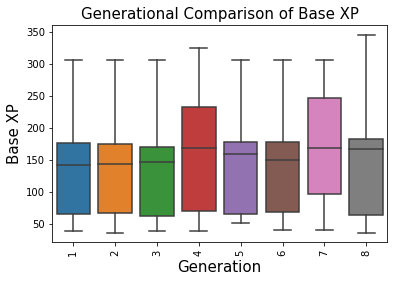

In [51]:
#Making boxplots to investigate generational differences in xp

#Creating boxplot with types in alphabetical order
sns.boxplot(y='base_experience', x='generation', data=pokemon_df, showfliers = False)

#Labeling and adjusting the boxplot
plt.xlabel("Generation", size=15)
plt.ylabel("Base XP", size=15)
plt.title("Generational Comparison of Base XP", size=15)
plt.xticks(rotation=90)

### Summary of Observations for Generational Differences of Base XP

#### Generations 4 and 8 stand out as being more variable and with a higher median and Q3 value (note generation 7 also has a higher Q1 base XP value. Generations 5, 6, and 8 are slightly elevated in terms of median XP but it is not clear if those differences are statistically significant based on our current work. This warrants further evaluation. We also do not have a clear case to explain why this variability exists but one might surmise that it could be related to regional Pokemon habitat differences.

### Investigating impact of generation on type distribution

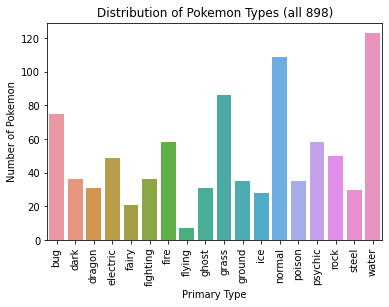

In [12]:
#looking at pokemon primary types (type 1) for all generations

p = sns.countplot(x="type1", data=pokemon_df, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 
                                                     'poison', 'psychic', 'rock', 'steel', 'water'])
p.set_title("Distribution of Pokemon Types (all 898)")
p.set(xlabel = "Primary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

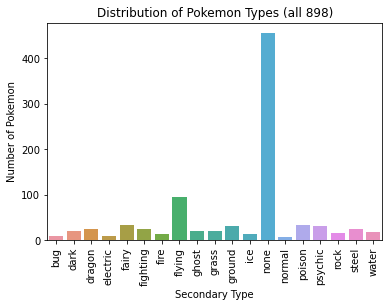

In [13]:
#looking at pokemon secondary types (type 2) for all generations

s = sns.countplot(x="type2", data=pokemon_df, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'none',
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
s.set_title("Distribution of Pokemon Types (all 898)")
s.set(xlabel = "Secondary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

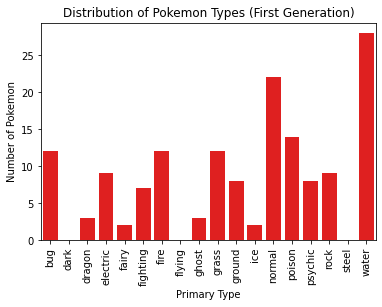

In [14]:
#looking at pokemon primary types - gen 1

p = sns.countplot(x="type1", data=pokemongen1df, color="red", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
p.set_title("Distribution of Pokemon Types (First Generation)")
p.set(xlabel = "Primary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

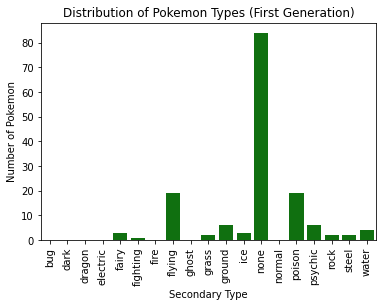

In [15]:
# looking at pokemon secondary types - Gen 1

s = sns.countplot(x="type2", data=pokemongen1df, color="green", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'none',
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
s.set_title("Distribution of Pokemon Types (First Generation)")
s.set(xlabel = "Secondary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

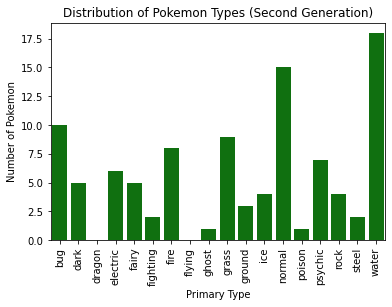

In [16]:
#looking at pokemon primary types - gen 2

p = sns.countplot(x="type1", data=pokemongen2df, color="green", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
p.set_title("Distribution of Pokemon Types (Second Generation)")
p.set(xlabel = "Primary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

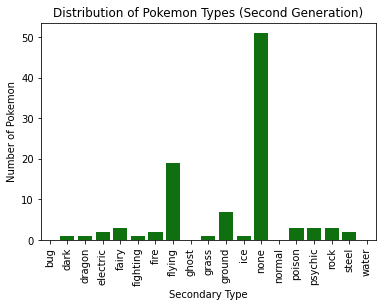

In [17]:
# looking at pokemon secondary types - Gen 2

s = sns.countplot(x="type2", data=pokemongen2df, color="green", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'none',
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
s.set_title("Distribution of Pokemon Types (Second Generation)")
s.set(xlabel = "Secondary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

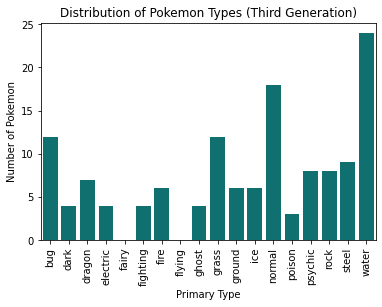

In [20]:
#looking at pokemon primary types - gen 3

p = sns.countplot(x="type1", data=pokemongen3df, color="teal", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
p.set_title("Distribution of Pokemon Types (Third Generation)")
p.set(xlabel = "Primary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

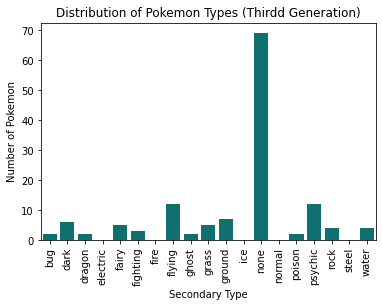

In [21]:
# looking at pokemon secondary types - Gen 3

s = sns.countplot(x="type2", data=pokemongen3df, color="teal", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'none',
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
s.set_title("Distribution of Pokemon Types (Thirdd Generation)")
s.set(xlabel = "Secondary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

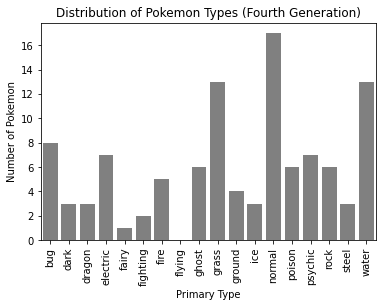

In [22]:
#looking at pokemon primary types - gen 4

p = sns.countplot(x="type1", data=pokemongen4df, color="grey", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
p.set_title("Distribution of Pokemon Types (Fourth Generation)")
p.set(xlabel = "Primary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

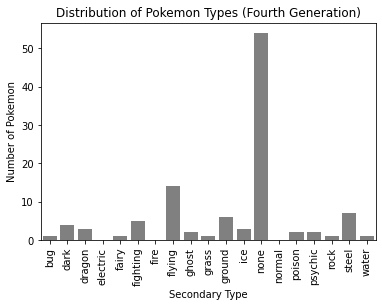

In [23]:
# looking at pokemon secondary types - Gen 4

s = sns.countplot(x="type2", data=pokemongen4df, color="grey", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'none',
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
s.set_title("Distribution of Pokemon Types (Fourth Generation)")
s.set(xlabel = "Secondary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

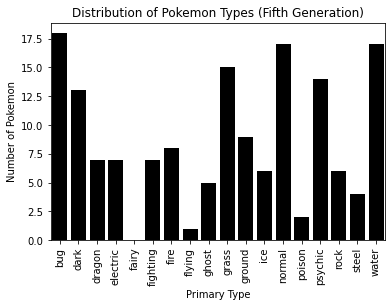

In [24]:
#looking at pokemon primary types - gen 5

p = sns.countplot(x="type1", data=pokemongen5df, color="black", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
p.set_title("Distribution of Pokemon Types (Fifth Generation)")
p.set(xlabel = "Primary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

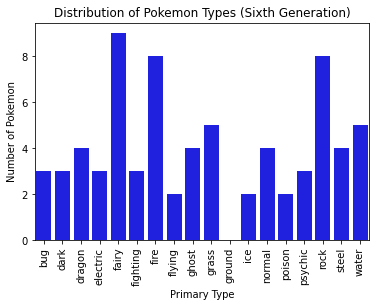

In [25]:
#looking at pokemon primary types - Gen 6

p = sns.countplot(x="type1", data=pokemongen6df, color="blue", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
p.set_title("Distribution of Pokemon Types (Sixth Generation)")
p.set(xlabel = "Primary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

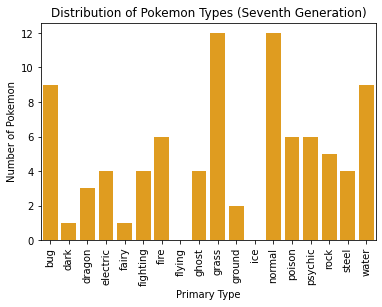

In [26]:
#looking at pokemon primary types - Gen 7

p = sns.countplot(x="type1", data=pokemongen7df, color="orange", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice',
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
p.set_title("Distribution of Pokemon Types (Seventh Generation)")
p.set(xlabel = "Primary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

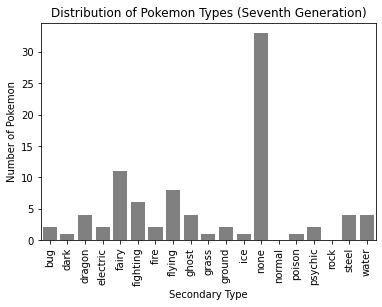

In [27]:
#looking at pokemon secondary types - Gen 7

s = sns.countplot(x="type2", data=pokemongen7df, color="grey", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'none',
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
s.set_title("Distribution of Pokemon Types (Seventh Generation)")
s.set(xlabel = "Secondary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

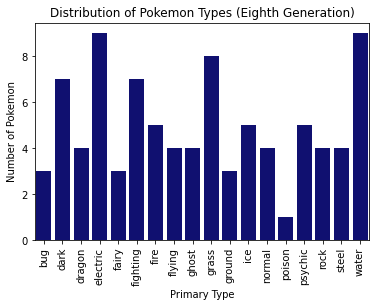

In [29]:
#looking at pokemon primary types - Gen 8

p = sns.countplot(x="type1", data=pokemongen8df, color="navy", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice',
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
p.set_title("Distribution of Pokemon Types (Eighth Generation)")
p.set(xlabel = "Primary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

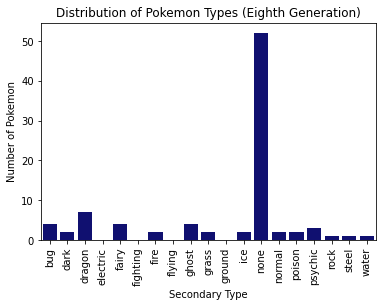

In [30]:
#looking at pokemon secondary types - Gen 8

s = sns.countplot(x="type2", data=pokemongen8df, color="navy", order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'none',
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
s.set_title("Distribution of Pokemon Types (Eighth Generation)")
s.set(xlabel = "Secondary Type", ylabel = "Number of Pokemon")
plt.xticks(rotation=90)
plt.show()

### Summary of relationship between Pokemon type distribution and Generation

#### Overall, the most common type is water, followed by normal, then grass
#### The least frequent types overall are flying and fairy
#### The majority of Pokemon have only one type, but for those that have a two types, the most common secondary type overall is flying.
#### The first few generations fall in line with these overall trends
#### Generational typing trends start diverging from the overall trends with Gen 4
#### Most common Gen 4 type = normal, followed by water and grass
#### Most common Gen 5 type = bug, followed by water and normal
#### Most common Gen 6 type = fairy, followed by fire and rock
#### … And Generations 7 and 8 diverge even more
#### Most common primary Gen 7 types = grass and normal
#### Most common secondary Gen 7 type = fairy
#### Most common primary Gen 8 types = electric and water
#### Most common secondary Gen 8 type = dragon


## Investigating Relationships between various Pokemon attributes & stats

## Making Basic Plots

### In the interest of making this easier to read, not every plot creation is fully commented. Doing so is redunant.

(0.6427146541003504, 8.70178660152555e-106)


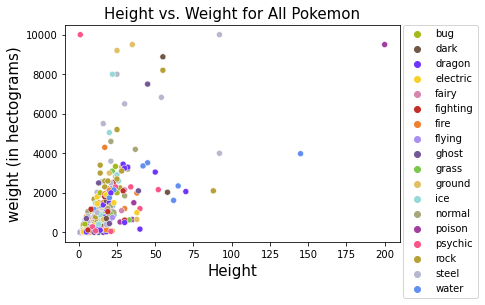

In [62]:
#Colors are correlated to Pokemon type. Here we create a custom palette so when we include hue for type
#it is tied to the Pokemon type
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]

sns.set_palette(sns.color_palette(colors))

#Making the scatter plot. Including hue order allows us to connect the color palette above to the intended type
sns.scatterplot(x='height', y='weight', data=pokemon_df, hue='type1', hue_order = ['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 
                                                     'fire', 'flying', 'ghost', 'grass', 'ground', 'ice',
                                                     'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])
#Customizing the plot
plt.xlabel("Height", size=15)
plt.ylabel("weight (in hectograms)", size=15)
plt.title("Height vs. Weight for All Pokemon", size=15)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

#Importing built in function for r value, calculating r and printing it
from scipy.stats import pearsonr
corr_wh=pearsonr(pokemon_df['height'], pokemon_df['weight'])
print(corr_wh)

(0.13130755663948784, 7.931336064110868e-05)


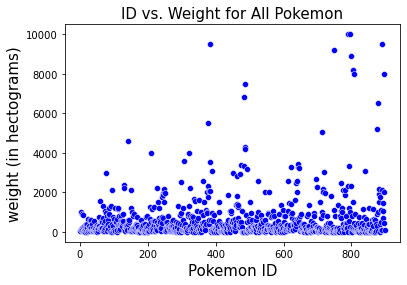

In [64]:
sns.scatterplot(x='id', y='weight', data=pokemon_df, color='b')

plt.xlabel("Pokemon ID", size=15)
plt.ylabel("weight (in hectograms)", size=15)
plt.title("ID vs. Weight for All Pokemon", size=15)

corr_id_w=pearsonr(pokemon_df['id'], pokemon_df['weight'])
print(corr_id_w)

Text(0.5, 1.0, 'ID vs. Height for All Pokemon')

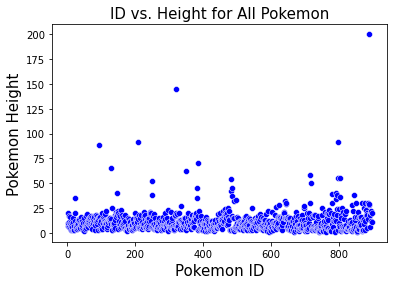

In [66]:
sns.scatterplot(x='id', y='height', data=pokemon_df, color = 'b')

plt.xlabel("Pokemon ID", size=15)
plt.ylabel("Pokemon Height", size=15)
plt.title("ID vs. Height for All Pokemon", size=15)

(0.43568092784422535, 6.7528549333738855e-43)


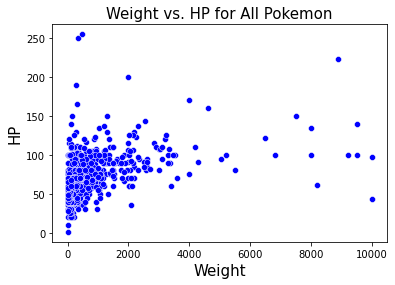

In [68]:
sns.scatterplot(x='weight', y='stats_hp', data=pokemon_df, color = 'b')
plt.xlabel("Weight", size=15)
plt.ylabel("HP", size=15)
plt.title("Weight vs. HP for All Pokemon", size=15)

corr_w_hp=pearsonr(pokemon_df['weight'], pokemon_df['stats_hp'])
print(corr_w_hp)

(0.4543654720376992, 5.973094070132914e-47)


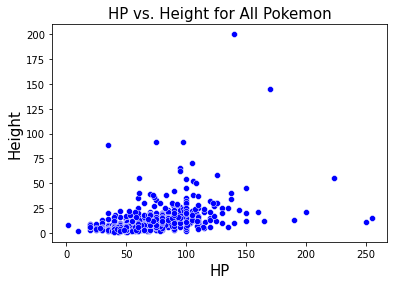

In [69]:
sns.scatterplot(x='stats_hp', y='height', data=pokemon_df, color ='b')
plt.xlabel("HP", size=15)
plt.ylabel("Height", size=15)
plt.title("HP vs. Height for All Pokemon", size=15)

corr_hp_h=pearsonr(pokemon_df['stats_hp'], pokemon_df['height'])
print(corr_hp_h)

(0.4571344866640685, 1.424871840339999e-47)


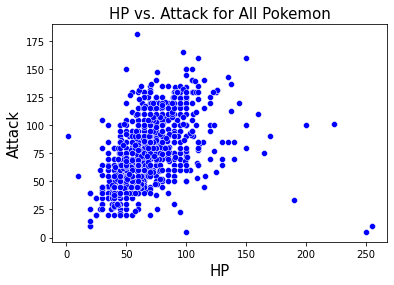

In [70]:
sns.scatterplot(x='stats_hp', y='stats_attack', data=pokemon_df, color = 'b')
plt.xlabel("HP", size=15)
plt.ylabel("Attack", size=15)
plt.title("HP vs. Attack for All Pokemon", size=15)


corr_hp_a=pearsonr(pokemon_df['stats_hp'], pokemon_df['stats_attack'])
print(corr_hp_a)

(0.2593188253564943, 2.890548627064695e-15)


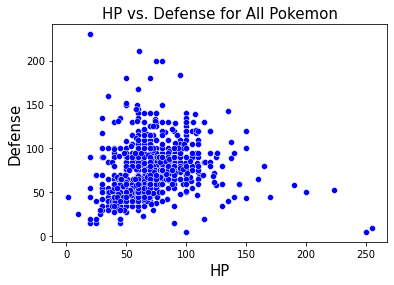

In [71]:
sns.scatterplot(x='stats_hp', y='stats_defense', data=pokemon_df, color = 'b')

plt.xlabel("HP", size=15)
plt.ylabel("Defense", size=15)
plt.title("HP vs. Defense for All Pokemon", size=15)

corr_hp_d=pearsonr(pokemon_df['stats_hp'], pokemon_df['stats_defense'])
print(corr_hp_d)

(0.37812158055344847, 6.699679516093999e-32)


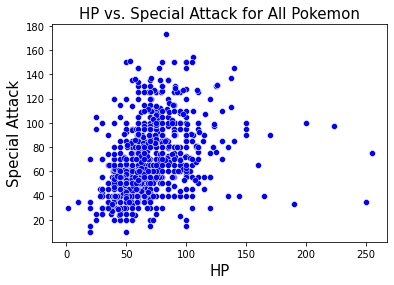

In [72]:
sns.scatterplot(x='stats_hp', y='stats_special_attack', data=pokemon_df, color = 'b')

plt.xlabel("HP", size=15)
plt.ylabel("Special Attack", size=15)
plt.title("HP vs. Special Attack for All Pokemon", size=15)

corr_hp_sa=pearsonr(pokemon_df['stats_hp'], pokemon_df['stats_special_attack'])
print(corr_hp_sa)

(0.3629403177682885, 2.4044514255893687e-29)


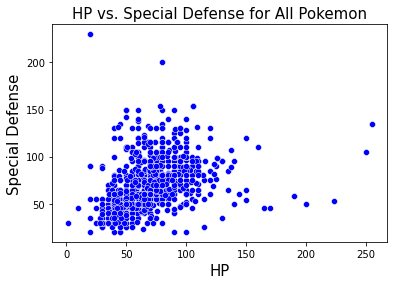

In [73]:
sns.scatterplot(x='stats_hp', y='stats_special_defense', data=pokemon_df, color = 'b')

plt.xlabel("HP", size=15)
plt.ylabel("Special Defense", size=15)
plt.title("HP vs. Special Defense for All Pokemon", size=15)

corr_hp_sd=pearsonr(pokemon_df['stats_hp'], pokemon_df['stats_special_defense'])
print(corr_hp_sd)

(0.1826271097913516, 3.5575814890797565e-08)


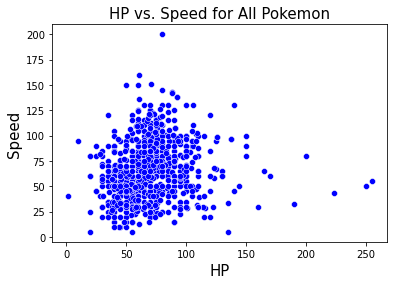

In [74]:
sns.scatterplot(x='stats_hp', y='stats_speed', data=pokemon_df, color ='b')

plt.xlabel("HP", size=15)
plt.ylabel("Speed", size=15)
plt.title("HP vs. Speed for All Pokemon", size=15)

corr_hp_s=pearsonr(pokemon_df['stats_hp'], pokemon_df['stats_speed'])
print(corr_hp_s)

Text(0.5, 1.0, 'Weight vs. Speed for All Pokemon')

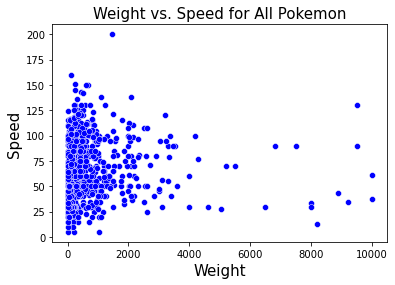

In [75]:
sns.scatterplot(x='weight', y='stats_speed', data=pokemon_df, color ='b')

plt.xlabel("Weight", size=15)
plt.ylabel("Speed", size=15)
plt.title("Weight vs. Speed for All Pokemon", size=15)

#Note: No Pearson r value calculated here.

(0.45519291922613514, 3.897659140511114e-47)


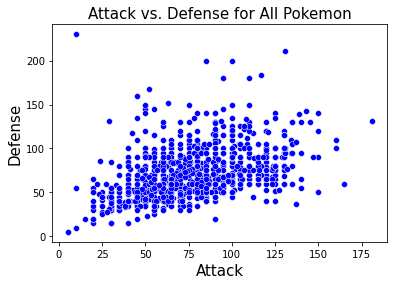

In [76]:
sns.scatterplot(x='stats_attack', y='stats_defense', data=pokemon_df, color ='b')

plt.xlabel("Attack", size=15)
plt.ylabel("Defense", size=15)
plt.title("Attack vs. Defense for All Pokemon", size=15)

corr_ad=pearsonr(pokemon_df['stats_attack'], pokemon_df['stats_defense'])
print(corr_ad)

(0.3196123813673278, 8.948220714875137e-23)


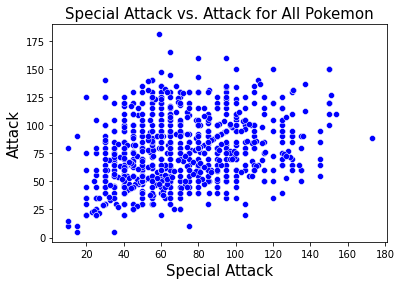

In [77]:
sns.scatterplot(x='stats_special_attack', y='stats_attack', data=pokemon_df, color = 'b')

plt.xlabel("Special Attack", size=15)
plt.ylabel("Attack", size=15)
plt.title("Special Attack vs. Attack for All Pokemon", size=15)

corr_sa_a=pearsonr(pokemon_df['stats_special_attack'], pokemon_df['stats_attack'])
print(corr_sa_a)

(0.49190675550597235, 6.779619365285543e-56)


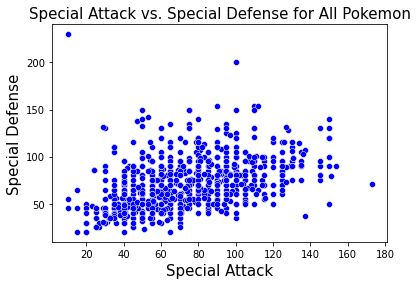

In [78]:
sns.scatterplot(x='stats_special_attack', y='stats_special_defense', data=pokemon_df, color = 'b')

plt.xlabel("Special Attack", size=15)
plt.ylabel("Special Defense", size=15)
plt.title("Special Attack vs. Special Defense for All Pokemon", size=15)

corr_sa_sd=pearsonr(pokemon_df['stats_special_attack'], pokemon_df['stats_special_defense'])
print(corr_sa_sd)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

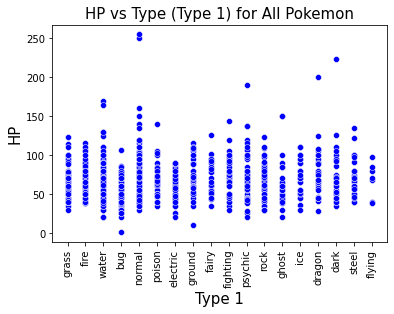

In [80]:
sns.scatterplot(x='type1', y='stats_hp', data=pokemon_df, color = 'b')

plt.xlabel("Type 1", size=15)
plt.ylabel("HP", size=15)
plt.title("HP vs Type (Type 1) for All Pokemon", size=15)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

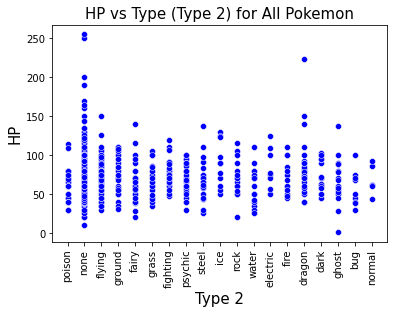

In [82]:
sns.scatterplot(x='type2', y='stats_hp', data=pokemon_df, color = 'b')

plt.xlabel("Type 2", size=15)
plt.ylabel("HP", size=15)
plt.title("HP vs Type (Type 2) for All Pokemon", size=15)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

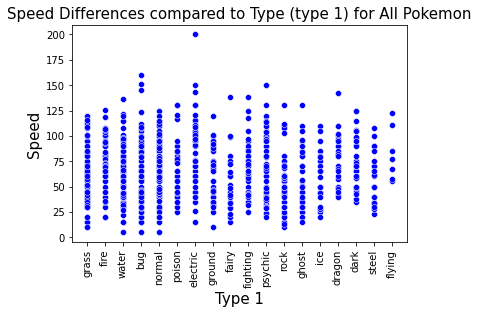

In [83]:
sns.scatterplot(x='type1', y='stats_speed', data=pokemon_df, color = 'b')

plt.xlabel("Type 1", size=15)
plt.ylabel("Speed", size=15)
plt.title("Speed Differences compared to Type (type 1) for All Pokemon", size=15)
plt.xticks(rotation=90)

(0.6812342146047712, 1.6926841213384165e-123)


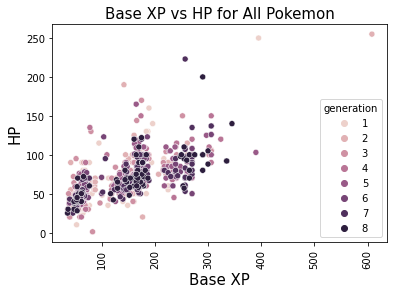

In [84]:
sns.scatterplot(x='base_experience', y='stats_hp', data=pokemon_df, hue = 'generation', legend = 'full')

plt.xlabel("Base XP", size=15)
plt.ylabel("HP", size=15)
plt.title("Base XP vs HP for All Pokemon", size=15)
plt.xticks(rotation=90)

corr_xp_hp=pearsonr(pokemon_df['base_experience'], pokemon_df['stats_hp'])
print(corr_xp_hp)

(0.475898108867359, 6.053641060394386e-52)


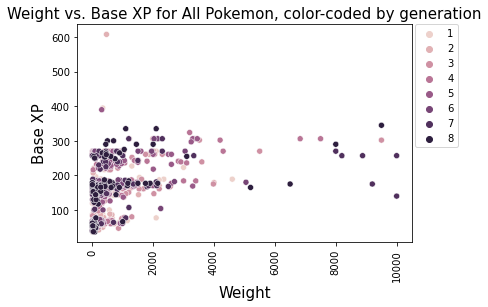

In [87]:
sns.scatterplot(x='weight', y='base_experience', data=pokemon_df, hue='generation', legend = 'full')

plt.xlabel("Weight", size=15)
plt.ylabel("Base XP", size=15)
plt.title("Weight vs. Base XP for All Pokemon, color-coded by generation", size=15)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

corr_w_xp=pearsonr(pokemon_df['height'], pokemon_df['base_experience'])
print(corr_w_xp)

### Summary of Relational Investigation into Pokemon attributes and stats

##### There are so many possibilities to investigate that this analysis just scratches the surface into relationships we found interesting. Many parameters have a weak positive correlation with one another (such as weight and height, height and hp, defense and attack, etc). These correlations all have an r value of less than 0.7, so it is very unlikely that we could use these relationships as we have currently investigated them to predict attributes or stats of a new or previously unknown Pokemon. Some comparisons shows no relationship existed. For instance, ID does not vary with any other factors. Surprisingly, hp & speed and weight and speed had no correlation. Speed seems to be fairly normally distributed against hp and weight. Weight vs. HP showed a similar relationship. There were several interesting findings when considering the relationship of base xp with other parameters; data falls into 3 distinct grouping for base xp vs. hp and weight vs. base xp. We suspect that these grouping may be related to evolutions, however the API data we pulled did not include evolutionary data. These findings are very interesting and would warrant further, more detailed exploration with a dataset that includes evolution data. It is also possible that some of the apparent outliers may be related to legendary or mythical Pokemon. However, that was also outside of the scope of the current investigation. 

### Does Pokemon type impact base statistics such as hp, experience, attack, defense? 

##### We make a series of boxplots below to investigate potential impacts of Pokemon type on attributes (weight, height) and base stats. Many of these analyses are very similar so not everything is fully commented to avoid significant amounts of redundant information.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'bug'),
  Text(1, 0, 'dark'),
  Text(2, 0, 'dragon'),
  Text(3, 0, 'electric'),
  Text(4, 0, 'fairy'),
  Text(5, 0, 'fighting'),
  Text(6, 0, 'fire'),
  Text(7, 0, 'flying'),
  Text(8, 0, 'ghost'),
  Text(9, 0, 'grass'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'ice'),
  Text(12, 0, 'normal'),
  Text(13, 0, 'poison'),
  Text(14, 0, 'psychic'),
  Text(15, 0, 'rock'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'water')])

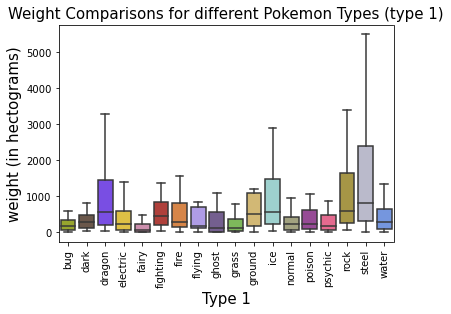

In [257]:
#Making boxplots to investigate difference in type

#Colors for Pokemon type from: https://www.epidemicjohto.com/t882-type-colors-hex-colors
#Setting a custom color palette.
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Creating boxplot with types in alphabetical order
sns.boxplot(y='weight', x='type1', data=pokemon_df, showfliers = False, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting',  'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])

#Labeling and adjusting the boxplot
plt.xlabel("Type 1", size=15)
plt.ylabel("weight (in hectograms)", size=15)
plt.title("Weight Comparisons for different Pokemon Types (type 1)", size=15)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'bug'),
  Text(1, 0, 'dark'),
  Text(2, 0, 'dragon'),
  Text(3, 0, 'electric'),
  Text(4, 0, 'fairy'),
  Text(5, 0, 'fighting'),
  Text(6, 0, 'fire'),
  Text(7, 0, 'flying'),
  Text(8, 0, 'ghost'),
  Text(9, 0, 'grass'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'ice'),
  Text(12, 0, 'normal'),
  Text(13, 0, 'poison'),
  Text(14, 0, 'psychic'),
  Text(15, 0, 'rock'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'water')])

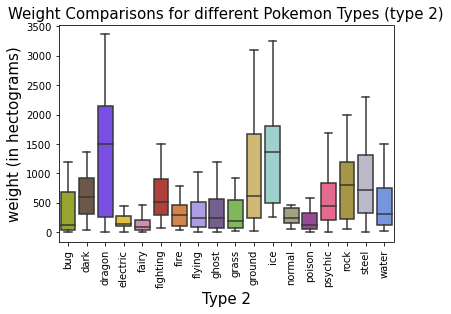

In [258]:
#Making boxplots to investigate difference in type

#Colors for Pokemon type from: https://www.epidemicjohto.com/t882-type-colors-hex-colors
#Setting a custom color palette.
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Creating boxplot with types in alphabetical order
sns.boxplot(y='weight', x='type2', data=pokemon_df, showfliers = False, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting',  'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])

#Labeling and adjusting the boxplot
plt.xlabel("Type 2", size=15)
plt.ylabel("weight (in hectograms)", size=15)
plt.title("Weight Comparisons for different Pokemon Types (type 2)", size=15)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'bug'),
  Text(1, 0, 'dark'),
  Text(2, 0, 'dragon'),
  Text(3, 0, 'electric'),
  Text(4, 0, 'fairy'),
  Text(5, 0, 'fighting'),
  Text(6, 0, 'fire'),
  Text(7, 0, 'flying'),
  Text(8, 0, 'ghost'),
  Text(9, 0, 'grass'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'ice'),
  Text(12, 0, 'normal'),
  Text(13, 0, 'poison'),
  Text(14, 0, 'psychic'),
  Text(15, 0, 'rock'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'water')])

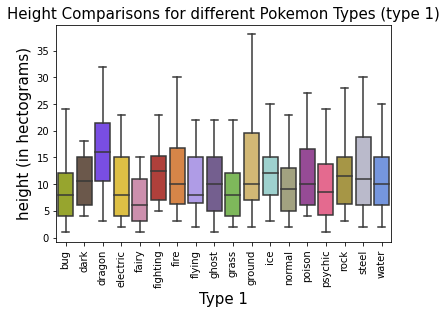

In [259]:
#Making boxplots to investigate difference in type

#Colors for Pokemon type from: https://www.epidemicjohto.com/t882-type-colors-hex-colors
#Setting a custom color palette.
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Creating boxplot with types in alphabetical order
sns.boxplot(y='height', x='type1', data=pokemon_df, showfliers = False, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting',  'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])

#Labeling and adjusting the boxplot
plt.xlabel("Type 1", size=15)
plt.ylabel("height (in hectograms)", size=15)
plt.title("Height Comparisons for different Pokemon Types (type 1)", size=15)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'bug'),
  Text(1, 0, 'dark'),
  Text(2, 0, 'dragon'),
  Text(3, 0, 'electric'),
  Text(4, 0, 'fairy'),
  Text(5, 0, 'fighting'),
  Text(6, 0, 'fire'),
  Text(7, 0, 'flying'),
  Text(8, 0, 'ghost'),
  Text(9, 0, 'grass'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'ice'),
  Text(12, 0, 'normal'),
  Text(13, 0, 'poison'),
  Text(14, 0, 'psychic'),
  Text(15, 0, 'rock'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'water')])

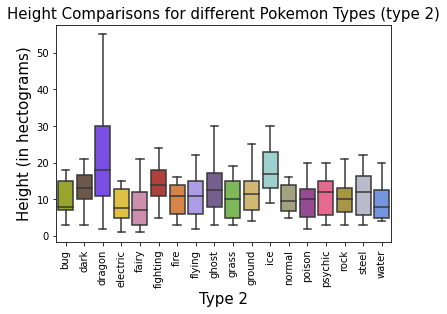

In [245]:
#Making boxplots to investigate difference in type

#Colors for Pokemon type from: https://www.epidemicjohto.com/t882-type-colors-hex-colors
#Setting a custom color palette.
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Creating boxplot with types in alphabetical order
sns.boxplot(y='height', x='type2', data=pokemon_df, showfliers = False, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting',  'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])

#Labeling and adjusting the boxplot
plt.xlabel("Type 2", size=15)
plt.ylabel("Height (in hectograms)", size=15)
plt.title("Height Comparisons for different Pokemon Types (type 2)", size=15)
plt.xticks(rotation=90)

### Base XP

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'bug'),
  Text(1, 0, 'dark'),
  Text(2, 0, 'dragon'),
  Text(3, 0, 'electric'),
  Text(4, 0, 'fairy'),
  Text(5, 0, 'fighting'),
  Text(6, 0, 'fire'),
  Text(7, 0, 'flying'),
  Text(8, 0, 'ghost'),
  Text(9, 0, 'grass'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'ice'),
  Text(12, 0, 'normal'),
  Text(13, 0, 'poison'),
  Text(14, 0, 'psychic'),
  Text(15, 0, 'rock'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'water')])

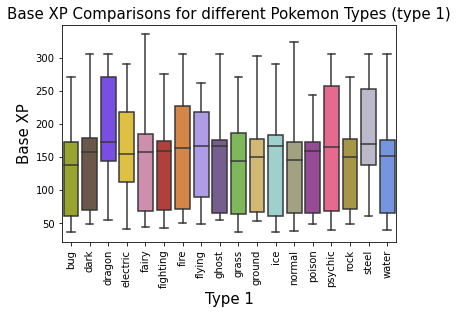

In [246]:
#Making boxplots to investigate difference in type

#Colors for Pokemon type from: https://www.epidemicjohto.com/t882-type-colors-hex-colors
#Setting a custom color palette.
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Creating boxplot with types in alphabetical order
sns.boxplot(y='base_experience', x='type1', data=pokemon_df, showfliers = False, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting',  'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])

#Labeling and adjusting the boxplot
plt.xlabel("Type 1", size=15)
plt.ylabel("Base XP", size=15)
plt.title("Base XP Comparisons for different Pokemon Types (type 1)", size=15)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'bug'),
  Text(1, 0, 'dark'),
  Text(2, 0, 'dragon'),
  Text(3, 0, 'electric'),
  Text(4, 0, 'fairy'),
  Text(5, 0, 'fighting'),
  Text(6, 0, 'fire'),
  Text(7, 0, 'flying'),
  Text(8, 0, 'ghost'),
  Text(9, 0, 'grass'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'ice'),
  Text(12, 0, 'normal'),
  Text(13, 0, 'poison'),
  Text(14, 0, 'psychic'),
  Text(15, 0, 'rock'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'water')])

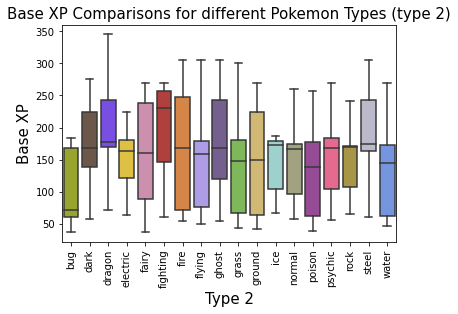

In [247]:
#Making boxplots to investigate difference in type

#Colors for Pokemon type from: https://www.epidemicjohto.com/t882-type-colors-hex-colors
#Setting a custom color palette.
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Creating boxplot with types in alphabetical order
sns.boxplot(y='base_experience', x='type2', data=pokemon_df, showfliers = False, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting',  'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])

#Labeling and adjusting the boxplot
plt.xlabel("Type 2", size=15)
plt.ylabel("Base XP", size=15)
plt.title("Base XP Comparisons for different Pokemon Types (type 2)", size=15)
plt.xticks(rotation=90)

### HP

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'bug'),
  Text(1, 0, 'dark'),
  Text(2, 0, 'dragon'),
  Text(3, 0, 'electric'),
  Text(4, 0, 'fairy'),
  Text(5, 0, 'fighting'),
  Text(6, 0, 'fire'),
  Text(7, 0, 'flying'),
  Text(8, 0, 'ghost'),
  Text(9, 0, 'grass'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'ice'),
  Text(12, 0, 'normal'),
  Text(13, 0, 'poison'),
  Text(14, 0, 'psychic'),
  Text(15, 0, 'rock'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'water')])

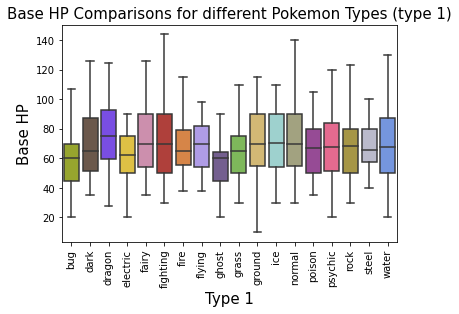

In [249]:
#Making boxplots to investigate difference in type

#Colors for Pokemon type from: https://www.epidemicjohto.com/t882-type-colors-hex-colors
#Setting a custom color palette.
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Creating boxplot with types in alphabetical order
sns.boxplot(y='stats_hp', x='type1', data=pokemon_df, showfliers = False, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting',  'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])

#Labeling and adjusting the boxplot
plt.xlabel("Type 1", size=15)
plt.ylabel("Base HP", size=15)
plt.title("Base HP Comparisons for different Pokemon Types (type 1)", size=15)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'bug'),
  Text(1, 0, 'dark'),
  Text(2, 0, 'dragon'),
  Text(3, 0, 'electric'),
  Text(4, 0, 'fairy'),
  Text(5, 0, 'fighting'),
  Text(6, 0, 'fire'),
  Text(7, 0, 'flying'),
  Text(8, 0, 'ghost'),
  Text(9, 0, 'grass'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'ice'),
  Text(12, 0, 'normal'),
  Text(13, 0, 'poison'),
  Text(14, 0, 'psychic'),
  Text(15, 0, 'rock'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'water')])

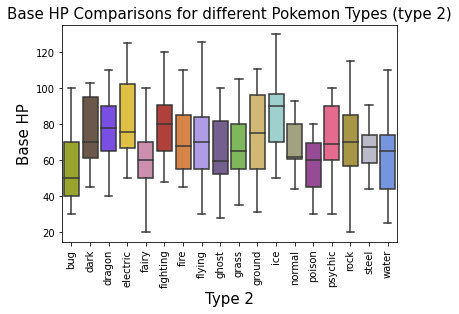

In [250]:
#Making boxplots to investigate difference in type

#Colors for Pokemon type from: https://www.epidemicjohto.com/t882-type-colors-hex-colors
#Setting a custom color palette.
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Creating boxplot with types in alphabetical order
sns.boxplot(y='stats_hp', x='type2', data=pokemon_df, showfliers = False, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting',  'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])

#Labeling and adjusting the boxplot
plt.xlabel("Type 2", size=15)
plt.ylabel("Base HP", size=15)
plt.title("Base HP Comparisons for different Pokemon Types (type 2)", size=15)
plt.xticks(rotation=90)

### Attack

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'bug'),
  Text(1, 0, 'dark'),
  Text(2, 0, 'dragon'),
  Text(3, 0, 'electric'),
  Text(4, 0, 'fairy'),
  Text(5, 0, 'fighting'),
  Text(6, 0, 'fire'),
  Text(7, 0, 'flying'),
  Text(8, 0, 'ghost'),
  Text(9, 0, 'grass'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'ice'),
  Text(12, 0, 'normal'),
  Text(13, 0, 'poison'),
  Text(14, 0, 'psychic'),
  Text(15, 0, 'rock'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'water')])

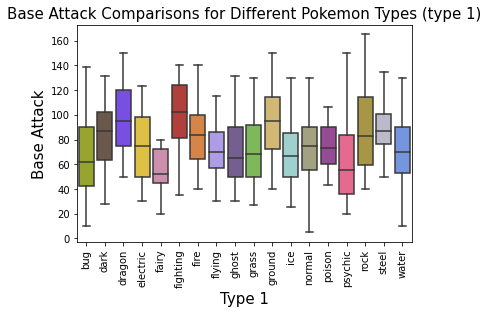

In [255]:
#Making boxplots to investigate difference in type

#Colors for Pokemon type from: https://www.epidemicjohto.com/t882-type-colors-hex-colors
#Setting a custom color palette.
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Creating boxplot with types in alphabetical order
sns.boxplot(y='stats_attack', x='type1', data=pokemon_df, showfliers = False, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting',  'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])

#Labeling and adjusting the boxplot
plt.xlabel("Type 1", size=15)
plt.ylabel("Base Attack", size=15)
plt.title("Base Attack Comparisons for Different Pokemon Types (type 1)", size=15)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'bug'),
  Text(1, 0, 'dark'),
  Text(2, 0, 'dragon'),
  Text(3, 0, 'electric'),
  Text(4, 0, 'fairy'),
  Text(5, 0, 'fighting'),
  Text(6, 0, 'fire'),
  Text(7, 0, 'flying'),
  Text(8, 0, 'ghost'),
  Text(9, 0, 'grass'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'ice'),
  Text(12, 0, 'normal'),
  Text(13, 0, 'poison'),
  Text(14, 0, 'psychic'),
  Text(15, 0, 'rock'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'water')])

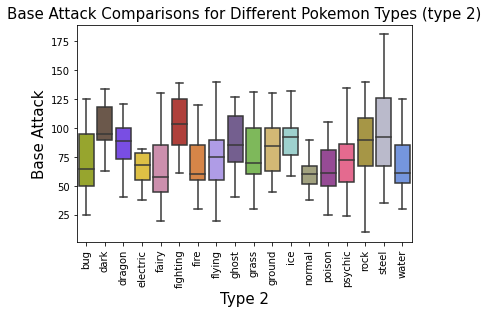

In [256]:
#Making boxplots to investigate difference in type

#Colors for Pokemon type from: https://www.epidemicjohto.com/t882-type-colors-hex-colors
#Setting a custom color palette.
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Creating boxplot with types in alphabetical order
sns.boxplot(y='stats_attack', x='type2', data=pokemon_df, showfliers = False, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting',  'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])

#Labeling and adjusting the boxplot
plt.xlabel("Type 2", size=15)
plt.ylabel("Base Attack", size=15)
plt.title("Base Attack Comparisons for Different Pokemon Types (type 2)", size=15)
plt.xticks(rotation=90)

### Defense

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'bug'),
  Text(1, 0, 'dark'),
  Text(2, 0, 'dragon'),
  Text(3, 0, 'electric'),
  Text(4, 0, 'fairy'),
  Text(5, 0, 'fighting'),
  Text(6, 0, 'fire'),
  Text(7, 0, 'flying'),
  Text(8, 0, 'ghost'),
  Text(9, 0, 'grass'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'ice'),
  Text(12, 0, 'normal'),
  Text(13, 0, 'poison'),
  Text(14, 0, 'psychic'),
  Text(15, 0, 'rock'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'water')])

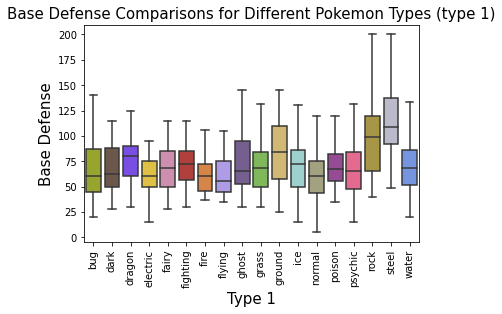

In [251]:
#Making boxplots to investigate difference in type

#Colors for Pokemon type from: https://www.epidemicjohto.com/t882-type-colors-hex-colors
#Setting a custom color palette.
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Creating boxplot with types in alphabetical order
sns.boxplot(y='stats_defense', x='type1', data=pokemon_df, showfliers = False, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting',  'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])

#Labeling and adjusting the boxplot
plt.xlabel("Type 1", size=15)
plt.ylabel("Base Defense", size=15)
plt.title("Base Defense Comparisons for Different Pokemon Types (type 1)", size=15)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'bug'),
  Text(1, 0, 'dark'),
  Text(2, 0, 'dragon'),
  Text(3, 0, 'electric'),
  Text(4, 0, 'fairy'),
  Text(5, 0, 'fighting'),
  Text(6, 0, 'fire'),
  Text(7, 0, 'flying'),
  Text(8, 0, 'ghost'),
  Text(9, 0, 'grass'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'ice'),
  Text(12, 0, 'normal'),
  Text(13, 0, 'poison'),
  Text(14, 0, 'psychic'),
  Text(15, 0, 'rock'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'water')])

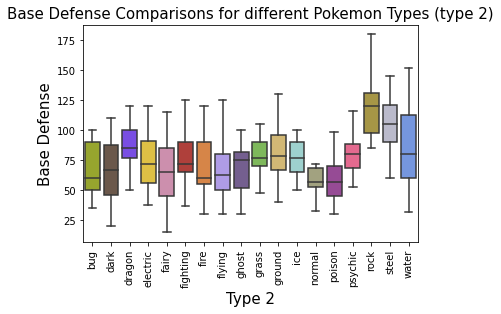

In [252]:
#Making boxplots to investigate difference in type

#Colors for Pokemon type from: https://www.epidemicjohto.com/t882-type-colors-hex-colors
#Setting a custom color palette.
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Creating boxplot with types in alphabetical order
sns.boxplot(y='stats_defense', x='type2', data=pokemon_df, showfliers = False, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting',  'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])

#Labeling and adjusting the boxplot
plt.xlabel("Type 2", size=15)
plt.ylabel("Base Defense", size=15)
plt.title("Base Defense Comparisons for different Pokemon Types (type 2)", size=15)
plt.xticks(rotation=90)

### Speed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'bug'),
  Text(1, 0, 'dark'),
  Text(2, 0, 'dragon'),
  Text(3, 0, 'electric'),
  Text(4, 0, 'fairy'),
  Text(5, 0, 'fighting'),
  Text(6, 0, 'fire'),
  Text(7, 0, 'flying'),
  Text(8, 0, 'ghost'),
  Text(9, 0, 'grass'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'ice'),
  Text(12, 0, 'normal'),
  Text(13, 0, 'poison'),
  Text(14, 0, 'psychic'),
  Text(15, 0, 'rock'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'water')])

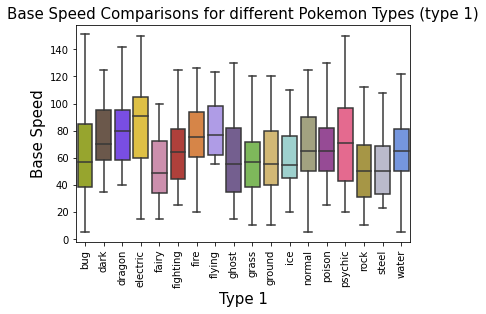

In [253]:
#Making boxplots to investigate difference in type

#Colors for Pokemon type from: https://www.epidemicjohto.com/t882-type-colors-hex-colors
#Setting a custom color palette.
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Creating boxplot with types in alphabetical order
sns.boxplot(y='stats_speed', x='type1', data=pokemon_df, showfliers = False, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting',  'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])

#Labeling and adjusting the boxplot
plt.xlabel("Type 1", size=15)
plt.ylabel("Base Speed", size=15)
plt.title("Base Speed Comparisons for different Pokemon Types (type 1)", size=15)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'bug'),
  Text(1, 0, 'dark'),
  Text(2, 0, 'dragon'),
  Text(3, 0, 'electric'),
  Text(4, 0, 'fairy'),
  Text(5, 0, 'fighting'),
  Text(6, 0, 'fire'),
  Text(7, 0, 'flying'),
  Text(8, 0, 'ghost'),
  Text(9, 0, 'grass'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'ice'),
  Text(12, 0, 'normal'),
  Text(13, 0, 'poison'),
  Text(14, 0, 'psychic'),
  Text(15, 0, 'rock'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'water')])

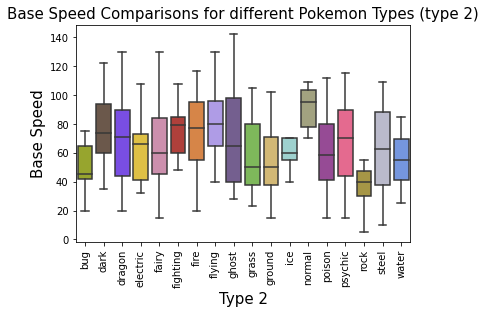

In [254]:
#Making boxplots to investigate difference in type

#Colors for Pokemon type from: https://www.epidemicjohto.com/t882-type-colors-hex-colors
#Setting a custom color palette.
colors = ["#A6B91A", "#705746", "#6F35FC", "#F7D02C", "#D685AD", "#C22E28", "#EE8130", "#A98FF3", "#735797", "#7AC74C", "#E2BF65", "#96D9D6", "#A8A77A", "#A33EA1", "#F95587", "#B6A136", "#B7B7CE", "#6390F0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#Creating boxplot with types in alphabetical order
sns.boxplot(y='stats_speed', x='type2', data=pokemon_df, showfliers = False, order=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting',  'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water'])

#Labeling and adjusting the boxplot
plt.xlabel("Type 2", size=15)
plt.ylabel("Base Speed", size=15)
plt.title("Base Speed Comparisons for different Pokemon Types (type 2)", size=15)
plt.xticks(rotation=90)

### Summary of Type Comparison

##### There are differences in attributes and stats based on Pokemon type. In most cases, similar patterns are seen when comparing Type 1 and Type 2 for the various species. Notably, certain types are more divergent than others when it comes to attributes and stats. For example, rock, steel and dragon types are heavier than others. Fairy and grass types tend to be lighter. There is less height variability but some still exists. In terms of stats, we similarly observe that different types are impacted differently for each attribute and stat studied. For instance, we can see that dragon types tend to have higher than "average" base experience values.

## Comparing Pokemon with 1 vs. 2 Types

In [31]:
#Using the Group By function to compare the base stats for Pokemon that belong to only 1 type compared to those 
# who belong to 2 types

In [32]:
#Calculating summary statistics for Pokemon based on type categorization (1 type vs 2 types)
pokemon_df.groupby('number_types').describe()

id                                                      \
              count        mean         std  min     25%    50%     75%   
number_types                                                              
1             456.0  435.813596  259.059199  4.0  208.25  430.0  651.50   
2             442.0  463.619910  259.235209  1.0  246.25  461.5  695.75   

                    height             ... stats_speed        generation  \
                max  count       mean  ...         75%    max      count   
number_types                           ...                                 
1             897.0  456.0  10.438596  ...        85.0  200.0      456.0   
2             898.0  442.0  13.325792  ...        90.0  160.0      442.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
number_types                                               
1             4.061404  2.278558  1.0  2.0  4.0  6.0  8.0  
2             4.235294  2.215964  1.0  2.0  4.0  6.0  8.0  

[2 rows x 88 columns]

### Considering differences in weight for Pokemon with 1 vs 2 types

Text(0.5, 1.0, 'Weight Comparisons for Pokemon with 1 vs 2 Types')

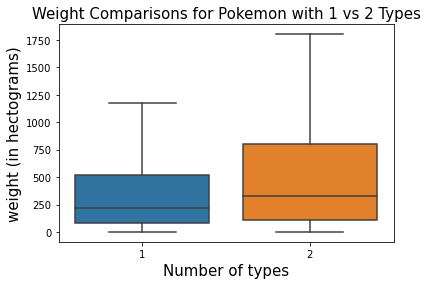

In [195]:
# Making boxplots for 2 examples (weight and base hp)
#Including outliers here makes the graphs too difficult to read (increases the y axis scale to the point that
#the graph's reduced size makes reading it very hard), so we pass in 'showfliers = False' to remove all outliers
#from the plot.

#Below is the example for weight, which DOES show a statistically significant difference for Pokemon with 1 vs 2 types.

sns.boxplot(y='weight', x='number_types', data=pokemon_df, showfliers = False)
plt.xlabel("Number of types", size=15)
plt.ylabel("weight (in hectograms)", size=15)
plt.title("Weight Comparisons for Pokemon with 1 vs 2 Types", size=15)


Text(0.5, 1.0, 'Base Defense Comparisons for Pokemon with 1 vs 2 Types')

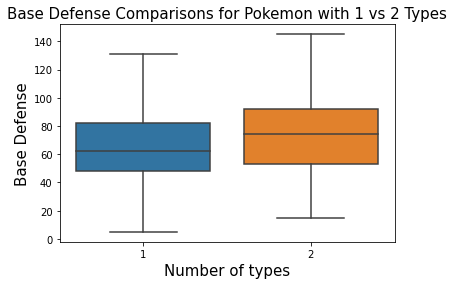

In [196]:
#Boxplot for defense, a characteristic which shows the largest difference between Pokemon with 1 and 2 types

sns.boxplot(y='stats_defense', x='number_types', data=pokemon_df, showfliers = False)
plt.xlabel("Number of types", size=15)
plt.ylabel("Base Defense", size=15)
plt.title("Base Defense Comparisons for Pokemon with 1 vs 2 Types", size=15)

Text(0.5, 1.0, 'Base HP Comparisons for Pokemon with 1 vs 2 Types')

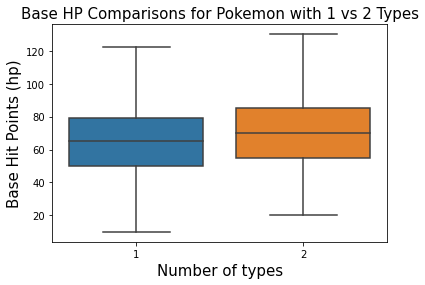

In [197]:
#Boxplot for base hp, a characteristic that does NOT show a statistically significant difference between Pokemon with 1 vs 2 types.

sns.boxplot(y='stats_hp', x='number_types', data=pokemon_df, showfliers = False)
plt.xlabel("Number of types", size=15)
plt.ylabel("Base Hit Points (hp)", size=15)
plt.title("Base HP Comparisons for Pokemon with 1 vs 2 Types", size=15)

<AxesSubplot:xlabel='number_types', ylabel='stats_speed'>

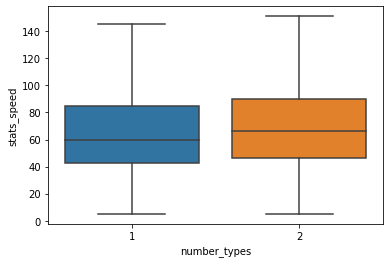

In [198]:
#Boxplot for speed, a characteristic that is *barely* statistically significant and likely warrants further analysis.

sns.boxplot(y='stats_speed', x='number_types', data=pokemon_df, showfliers = False)

In [199]:
# Considering statistical significance (or trying to...)
import numpy as np
from scipy.stats import ttest_ind

#For loop to make new arrays depending on if Pokemon has 1 or 2 types
type_1w=[]
type_1h=[]
type_1base_hp=[]
type_1base_xp=[]
type_1attack=[]
type_1defense=[]
type_1sattack=[]
type_1sdefense=[]
type_1speed=[]
type_2w=[]
type_2h=[]
type_2base_hp=[]
type_2base_xp=[]
type_2attack=[]
type_2defense=[]
type_2sattack=[]
type_2sdefense=[]
type_2speed=[]

for p in pokemon_all:
    if p['number_types'] == 1:
        type_1w.append(p['weight'])
        type_1h.append(p['height'])
        type_1base_xp.append(p['base_experience'])
        type_1base_hp.append(p['stats_hp'])
        type_1attack.append(p['stats_attack'])
        type_1defense.append(p['stats_defense'])
        type_1sattack.append(p['stats_special_attack'])
        type_1sdefense.append(p['stats_special_defense'])
        type_1speed.append(p['stats_speed'])
    else:
        type_2w.append(p['weight'])
        type_2h.append(p['height'])
        type_2base_xp.append(p['base_experience'])
        type_2base_hp.append(p['stats_hp'])
        type_2attack.append(p['stats_attack'])
        type_2defense.append(p['stats_defense'])
        type_2sattack.append(p['stats_special_attack'])
        type_2sdefense.append(p['stats_special_defense'])
        type_2speed.append(p['stats_speed'])
print(len(pokemon_all))
print(len(type_1w))
print(len(type_2w))
    


898
456
442


### Weight comparison for 1 vs 2 types

In [200]:
#performing t test to compare pokemon with 1 type and 2 types
res_weight = ttest_ind(type_1w, type_2w)
print(res_weight)

Ttest_indResult(statistic=-2.239817614641247, pvalue=0.025347307101461658)


#### Interpreting the statistical results

###### T = 2.24 and p = 0.025. Since a p value of <0.05 is generally accepted as being statistically significant, we can conclude that Pokemon with 2 types tend to weigh more and we can say with some confidence that this result is statistically significant.

### Height comparison for 1 vs 2 types

In [201]:
#performing t test to compare pokemon with 1 type and 2 types
res_height = ttest_ind(type_1h, type_2h)
print(res_height)

Ttest_indResult(statistic=-3.5268742110258535, pvalue=0.000441836045784849)


#### Interpreting the statistical results

##### T-value = -2.02 and p-value =0.044 indicating that there is a statistically significant result where Pokemon with 2 types tend to be taller than Pokemon with only 1 type. Of note is that this relationship is not as strong as that indicated for differences in weight.

### Base XP comparison for 1 vs 2 types

In [202]:
#performing t test to compare pokemon with 1 type and 2 types
res_base_xp = ttest_ind(type_1base_xp, type_2base_xp)
print(res_base_xp)

Ttest_indResult(statistic=-4.297822479439341, pvalue=1.9137301974912578e-05)


### Interpreting the statistical results

##### There is a statistically significant difference in base experience between Pokemon with 1 and 2 types, with (at least) the initial advantage going to Pokemon with 2 types.

### Base HP comparison for 1 vs 2 types

In [203]:
#performing t test to compare pokemon with 1 type and 2 types
res_hp = ttest_ind(type_1base_hp, type_2base_hp)
print(res_hp)

Ttest_indResult(statistic=-1.8158698450656743, pvalue=0.06972445724908508)


### Interpreting the statistical results

##### There is no statistically significant differences between Pokemon with 1 or 2 types in terms of their base hit points (hp).

### Base Attack comparison for 1 vs 2 types

In [204]:
#performing t test to compare pokemon with 1 type and 2 types
res_attack = ttest_ind(type_1attack, type_2attack)
print(res_attack)

Ttest_indResult(statistic=-2.5124133195948026, pvalue=0.01216553644615866)


### Interpreting the statistical results

##### There is a stastically significant difference in base attack; Pokemon with 2 types typically have a higher base attack.

### Base Defense comparison for 1 vs 2 types

In [205]:
#performing t test to compare pokemon with 1 type and 2 types
res_defense = ttest_ind(type_1defense, type_2defense)
print(res_defense)

Ttest_indResult(statistic=-4.853623726132144, pvalue=1.4296580340770786e-06)


### Interpreting the statistical results

##### There is a statistically significant difference in base defense; Pokemon with 2 types typically have a higher base defense.

### Base Special Attack comparison for 1 vs 2 types

In [206]:
#performing t test to compare pokemon with 1 type and 2 types
res_special_attack = ttest_ind(type_1sattack, type_2sattack)
print(res_special_attack)

Ttest_indResult(statistic=-3.923357120543236, pvalue=9.400214775786104e-05)


### Interpreting the statistical results

##### There is a statistically significant difference in terms of base special attack; Pokemon with 2 types tend to have a higher base special attack.

### Base Special Defense comparison for 1 vs 2 types

In [207]:
#performing t test to compare pokemon with 1 type and 2 types
res_special_defense = ttest_ind(type_1sdefense, type_2sdefense)
print(res_special_defense)

Ttest_indResult(statistic=-3.467353797591098, pvalue=0.0005506127357599869)


### Statistical Interpretation

##### There is a statistically significant difference in terms of base special defense; Pokemon with 2 types tend to have a higher base special defense.

### Base Speed comparison for 1 vs 2 types

In [208]:
#performing t test to compare pokemon with 1 type and 2 types
res_speed = ttest_ind(type_1speed, type_2speed)
print(res_speed)

Ttest_indResult(statistic=-1.9762274798874315, pvalue=0.04843537704073465)


### Statistical Interpretation

##### There is a questionably statistically significant difference in speed between Pokemon with 1 vs 2 types. The p value is very close to the cut off for statistical significance and should therefore be interpreted and approached with caution. A different approach would be warranted to investigate these potential differences. 

### Summary of Comparison Results

         attribute   p_value
0          defense  0.000001
1   special attack  0.000094
2          base_xp  0.000019
3  special_defense  0.000551
4           height  0.000442
5           attack  0.012166
6           weight  0.025347
7            speed  0.048435
8               hp  0.069724


Text(0.5, 1.2, 'Summary of P-values for Pokemon with 1 vs 2 types')

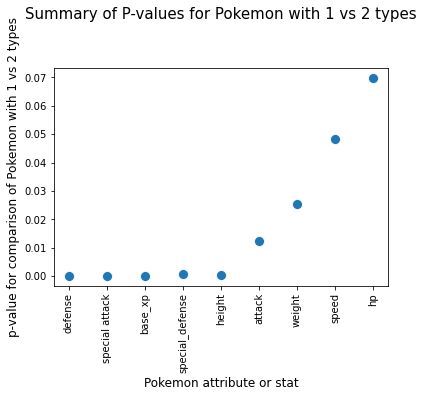

In [232]:
#Making a new data frame to hold the attribute and stat values and the p-values calculated above comparing 
#Pokemon with 1 vs 2 types. 
pvalue_data = [['defense', res_defense[1]], ['special attack', res_special_attack[1]], ['base_xp', res_base_xp[1]], ['special_defense', res_special_defense[1]], ['height', res_height[1]], ['attack', res_attack[1]], ['weight', res_weight[1]], ['speed', res_speed[1]], ['hp', res_hp[1]]]
pvalue_data_df=pd.DataFrame(pvalue_data, columns = ['attribute', 'p_value'])
print(pvalue_data_df)

#Making a scatterplot in seaborn to plot the attribute and state values with the p-values.
#Goal here is to include a summary visualization to discuss which attributes and stats seem to be MOST impacted
#by having 1 vs 2 types.
sns.scatterplot(x = 'attribute', y = 'p_value', data = pvalue_data_df, s=100)

#Customizing the scatterplot by: rotating labels to be more readable, labeling the axes and giving the plot a title
#Also setting font size and offsetting the title to make it easier to read
plt.xticks(rotation=90)
plt.xlabel("Pokemon attribute or stat", size=12)
plt.ylabel("p-value for comparison of Pokemon with 1 vs 2 types", size=12)
plt.title("Summary of P-values for Pokemon with 1 vs 2 types", size=15, y = 1.2)

### Summary of Comparison of 1 vs. 2 Types of Pokemon

##### We compared the attributes (height, weight) and base stats (hp, xp, attack, etc) for Pokemon representing only 1 type compared to Pokemon having 2 types. We made use of boxplots to visualize the differences between the number of types. In order to determine the statistical significance of differences between these 2 sub-populations, we used t-tests and calculated p-values. We used a p-value threshold of 0.05 to determine statistical significance. Overall, there exist many statistically significant differences in the attributes and base stats for Pokemon belonging to 2 types compared to Pokemon belonging to only 1 type. Pokemon with 2 types tend to be heavier, taller, have higher: base xp, attack and defense (and special attack and defense). There was no apparent difference in speed or base hp. However, much of the game is based on type advantage compared to your opponent. So having 2 types means you have potential advantages but also additional weaknesses and disadvantages. These increases in base stats may be included to at least partially make up for the increased weaknesses inferred by having 2 types.

### We have now come to the end of our Poke Plotting journey. We hoped you learned something and have realized how much there is yet to discover in the world of Pokemon. Until next time!